# Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [1]:
# Import the titanic dataset here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *

data_dir = "https://dlsun.github.io/pods/data/"
df_titanic = pd.read_csv(data_dir + "titanic.csv")
df_titanic.head()

,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1


## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [3]:
# sorting for passenger
df_titanic["type"] = df_titanic["class"].map({
    "1st": "passenger",
    "2nd": "passenger",
    "3rd": "passenger",
    "victualling crew": "crew",
    "engineering crew": "crew",
    "deck crew": "crew"
})

df_titanic1 = df_titanic[df_titanic["type"] == "passenger"]
df_titanic1.head()

,name,gender,age,class,embarked,country,ticketno,fare,survived,type
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0,passenger
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0,passenger
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0,passenger
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1,passenger
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1,passenger


In [4]:
embarked_mapping = {'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'}

data = pd.crosstab(df_titanic1["class"], df_titanic1["embarked"].map(embarked_mapping))
data

embarked,Cherbourg,Queenstown,Southampton
class,,,
1st,143,3,175
2nd,26,7,245
3rd,102,113,494


## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?
* What proportion of Southampton passengers were in 3rd class?

In [5]:
# conditional dist of class given where they embarked
#embarked_mapping = {'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'}

pd.crosstab(df_titanic1["class"], df_titanic1["embarked"].map(embarked_mapping), normalize='index')  #index rows (conditoning on row) 'column' normalize columns


embarked,Cherbourg,Queenstown,Southampton
class,,,
1st,0.445483,0.009346,0.545171
2nd,0.093525,0.025180,0.881295
3rd,0.143865,0.159379,0.696756


69% of 3rd class passenegers embarked in southampton

```
# This is formatted as code
```



In [6]:
# conditional dist of where emabrked given class
#embarked_mapping = {'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'}

pd.crosstab(df_titanic1["class"], df_titanic1["embarked"].map(embarked_mapping), normalize='columns')

embarked,Cherbourg,Queenstown,Southampton
class,,,
1st,0.527675,0.024390,0.191466
2nd,0.095941,0.056911,0.268053
3rd,0.376384,0.918699,0.540481


54% of southampton passenegers were in third class


## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

<Axes: xlabel='class'>

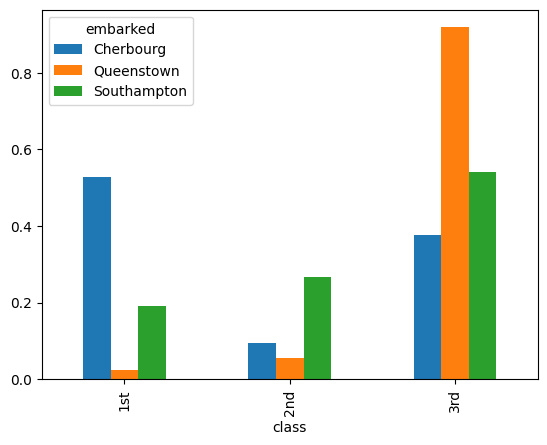

In [7]:
pd.crosstab(df_titanic1["class"], df_titanic1["embarked"].map(embarked_mapping), normalize='columns').plot(kind = 'bar')

The visualization makes it easy to take a quick glance, but makes it much harder to intepret real values. By spending an extra 30 seconds you can look at the distributions and have a stronger understanding of the data.